<a href="https://colab.research.google.com/github/Jaumzinho109/Impactus_Python_Scripts/blob/main/Juros_e_afins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

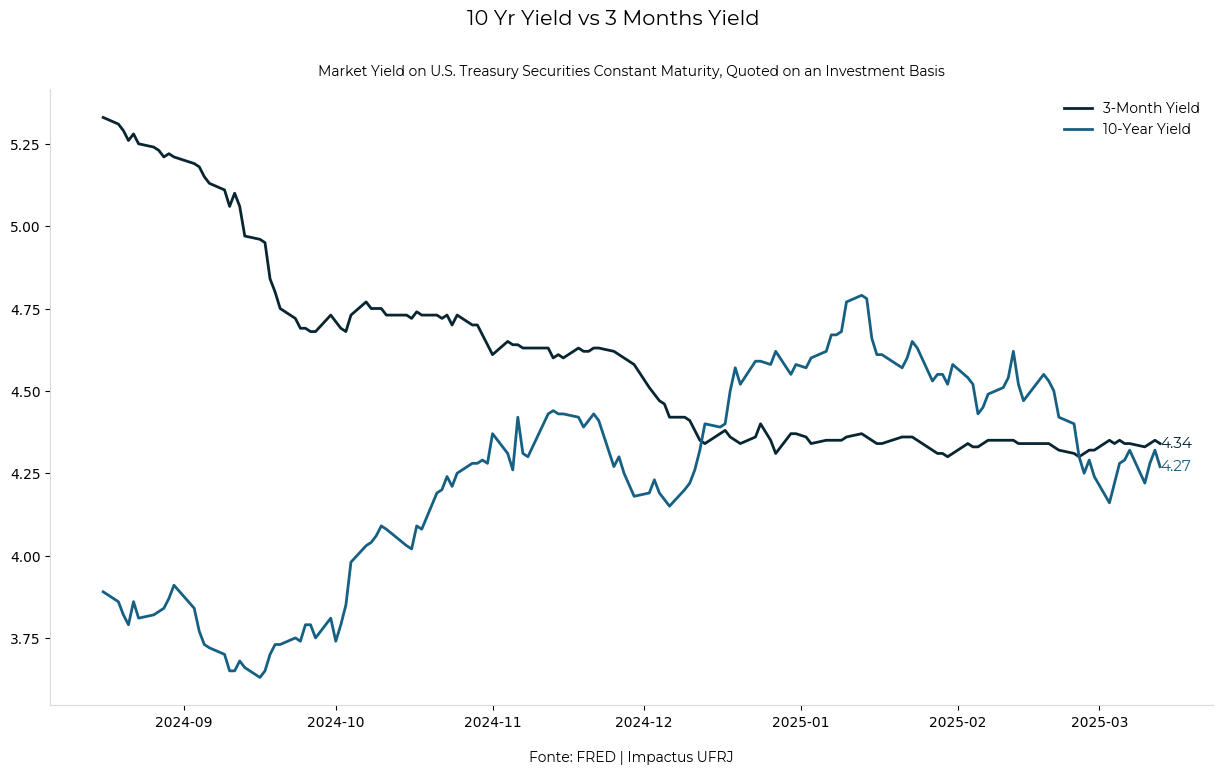

In [1]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm

font_path = r"C:\Users\Joao\Downloads\Montserrat\static\Montserrat-Regular.ttf"
font_prop = fm.FontProperties(fname=font_path)
fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

tyy = fred.get_series("DGS10")
ten_yr_yield = pd.DataFrame(tyy, columns=['10-Year Yield']).tail(150).dropna()

tmy = fred.get_series("DGS3MO")
three_months_yields = pd.DataFrame(tmy, columns=['3-Month Yield']).tail(150).dropna()
index = three_months_yields.index

plt.figure(figsize=(15, 8))
plt.plot(index, three_months_yields, label='3-Month Yield', linewidth=2, color="#082631")
plt.plot(index, ten_yr_yield, label='10-Year Yield', linewidth=2, color="#166083")
plt.suptitle("10 Yr Yield vs 3 Months Yield", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.title("Market Yield on U.S. Treasury Securities Constant Maturity, Quoted on an Investment Basis",
          fontsize=12, style='italic', pad=10, fontproperties=font_prop)
plt.legend(frameon=False, loc='upper right', fontsize=11, prop=font_prop)
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=10, labelpad=15, fontproperties=font_prop)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#d9d9d9')
plt.gca().spines['bottom'].set_color('#d9d9d9')

final_value_3mo = three_months_yields.iloc[-1, 0]
plt.text(index[-1], final_value_3mo,
         f'{final_value_3mo:.2f}',
         color="#082631",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

final_value_10yr = ten_yr_yield.iloc[-1, 0]
plt.text(index[-1], final_value_10yr,
         f'{final_value_10yr:.2f}',
         color="#166083",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')


plt.gca().xaxis.grid(False)
plt.show()



In [ ]:
#tem que criar o índice anteriormente e instalar o abridor de excel, eu amo programar!!!!!!!!!!!!

juros = pd.DataFrame()
juros["10 anos"] = ten_yr_yield["10-Year Yield"]
juros["3 meses"] = three_months_yields["3-Month Yield"]
juros.index = ind
juros.index = pd.to_datetime(index).strftime('%Y-%m-%d')

juros.to_excel('dados.xlsx', index=True)
import os

# Abra o arquivo Excel (somente Windows)
os.startfile('dados.xlsx')

In [ ]:
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_prop.get_name()


In [ ]:
be = fred.get_series("T5YIE")
breakeven_5yr = pd.DataFrame()
breakeven_5yr["Breakeven de 5 anos"] = pd.DataFrame(be)
breakeven_5yr = breakeven_5yr.dropna().tail(150)

br = fred.get_series("T10YIE")
breakeven_10yr = pd.DataFrame()
breakeven_10yr["Breakeven de 10 anos"] = pd.DataFrame(br)
breakeven_10yr = breakeven_10yr.dropna().tail(150)

# Não resetamos o índice aqui, mantemos as datas
# O índice já é a data
index = breakeven_10yr.index  # Usando o índice de data original

plt.figure(figsize=(15, 8))
plt.plot(index, breakeven_5yr["Breakeven de 5 anos"], label='5-Year Breakeven Rate', linewidth=2, color="#082631")
plt.plot(index, breakeven_10yr["Breakeven de 10 anos"], label='10-Year Breakeven Rate', linewidth=2, color="#166083")
plt.suptitle("Inflation Breakeven: 5-Year vs 10 Year", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.legend(frameon=False, loc='upper left', fontsize=11, prop=font_prop)
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=10, labelpad=15, fontproperties=font_prop)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#d9d9d9')
plt.gca().spines['bottom'].set_color('#d9d9d9')

# Marcação com os valores finais
final_value_5yr = breakeven_5yr.iloc[-1, 0]
plt.text(index[-1], final_value_5yr,
         f'{final_value_5yr:.2f}',
         color="#082631",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

final_value_10yr = breakeven_10yr.iloc[-1, 0]
plt.text(index[-1], final_value_10yr,
         f'{final_value_10yr:.2f}',
         color="#166083",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

plt.gca().xaxis.grid(False)
plt.show()

In [ ]:
breakeven = pd.DataFrame()
breakeven["10 anos"] = breakeven_10yr["Breakeven de 10 anos"]
breakeven["5 anos"] = breakeven_5yr["Breakeven de 5 anos"]
breakeven.index = inx
breakeven.index = pd.to_datetime(index).strftime('%Y-%m-%d')

breakeven.to_excel('dados.xlsx', index=True)
import os

# Abra o arquivo Excel (somente Windows)
os.startfile('dados.xlsx')